In [ ]:
# import seaborn planets datasets

import seaborn as sns # para o dataset
import pandas as pd # para manipular
import matplotlib.pyplot as plt # pra plota


planets = sns.load_dataset('planets') # carrega o dataset
planets_df = pd.DataFrame(planets) # transforma em dataframe
planets_df[:100] # só 100 registros

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
95,Transit,1,4.037896,NaN,NaN,2009
96,Transit,1,8.886593,NaN,NaN,2009
97,Transit,2,0.853585,NaN,150.00,2009
98,Radial Velocity,2,3.698000,NaN,150.00,2009


In [ ]:
# acha colunas com NaN ou faltantes (vazio, "-", ou etc)
planets_df.isna().sum()

# mostre quantas linhas tem valores NaN e quantas não tem
planets_df.isna().sum() / len(planets_df) * 100


,0
method,0.000000
number,0.000000
orbital_period,4.154589
mass,50.434783
distance,21.932367
year,0.000000


In [ ]:
# função para remover linhas/colunas com nan

def remove_nan(df, axis=0): # por padrão remove x (linha) TODAS
  #recebe se é linha ou coluna, e remove a linha ou coluna passada
  if axis == 0:
    df.dropna(inplace=True)
  else:
    df.dropna(axis=1, inplace=True)

# remove TODAS AS LINHAS
remove_nan(planets_df)

# remove TODAS COLUNAS
remove_nan(planets_df, 1)



In [ ]:
planets_df[:100]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
...,...,...,...,...,...,...
211,Radial Velocity,1,431.880,2.07,77.82,2001
212,Radial Velocity,1,356.000,2.30,131.41,2009
213,Radial Velocity,2,360.200,2.37,56.50,2012
214,Radial Velocity,2,2732.000,2.37,56.50,2012


In [ ]:
# preencher valores invaidos

def preencher_valores_invalidos(df, coluna, value):
  if type == "media":
    df[coluna].fillna(df[coluna].mean(), inplace=True)
    return
  if type == "mediana":
    df[coluna].fillna(df[coluna].median(), inplace=True)
    return
  if type == "moda":
    df[coluna].fillna(df[coluna].mode()[0], inplace=True)
    return
  if type == "zero":
    df[coluna].fillna(0, inplace=True)
  if type == "anterior":
    df[coluna].fillna(method='ffill', inplace=True)
  if type == "proximo":
    df[coluna].fillna(method='bfill', inplace=True)

  df[coluna].fillna(value, inplace=True)

preencher_valores_invalidos(planets_df, "mass", "anterior")
planets_df[:100]


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
...,...,...,...,...,...,...
211,Radial Velocity,1,431.880,2.07,77.82,2001
212,Radial Velocity,1,356.000,2.30,131.41,2009
213,Radial Velocity,2,360.200,2.37,56.50,2012
214,Radial Velocity,2,2732.000,2.37,56.50,2012


In [ ]:
# realiza normalização entre 0 e 1 de TODAS COLUNAS (menos valores qualitativos né)
# Exemplo
# se X é o maior valor na coluna, X -> 1
# se y é o menor valor na coluna, y -> 0
# se z é x/2, então z é 0.5

def normalizar(df):
    # Seleciona apenas colunas quantitativas
    colunas_quantitativas = df.select_dtypes(include=['float64', 'int64'])

    # Calcula o mínimo e máximo de cada coluna quantitativa
    colunas_quantitativas_min = colunas_quantitativas.min() # menor valor
    colunas_quantitativas_max = colunas_quantitativas.max() # maior valor

    # Aplica a normalização (min-max normalization)
    colunas_quantitativas_normalizadas = (colunas_quantitativas/colunas_quantitativas_max)

    # Atualiza as colunas normalizadas no DataFrame original
    df[colunas_quantitativas.columns] = colunas_quantitativas_normalizadas

    return df

# Exemplo de uso
planets_df = normalizar(planets_df)

# Visualiza as primeiras 100 linhas
planets_df.head(100)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,0.166667,0.015533,0.2840,0.218644,0.996028
1,Radial Velocity,0.166667,0.050456,0.0884,0.160876,0.997021
2,Radial Velocity,0.166667,0.044009,0.1040,0.056045,0.998510
3,Radial Velocity,0.166667,0.018805,0.7760,0.312486,0.996524
4,Radial Velocity,0.166667,0.029775,0.4200,0.337486,0.997517
...,...,...,...,...,...,...
211,Radial Velocity,0.166667,0.024910,0.0828,0.219831,0.993545
212,Radial Velocity,0.166667,0.020534,0.0920,0.371215,0.997517
213,Radial Velocity,0.333333,0.020776,0.0948,0.159605,0.999007
214,Radial Velocity,0.333333,0.157578,0.0948,0.159605,0.999007


In [ ]:
import matplotlib.pyplot as plt

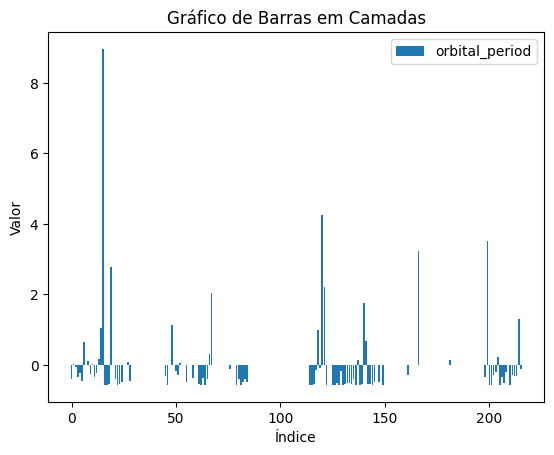

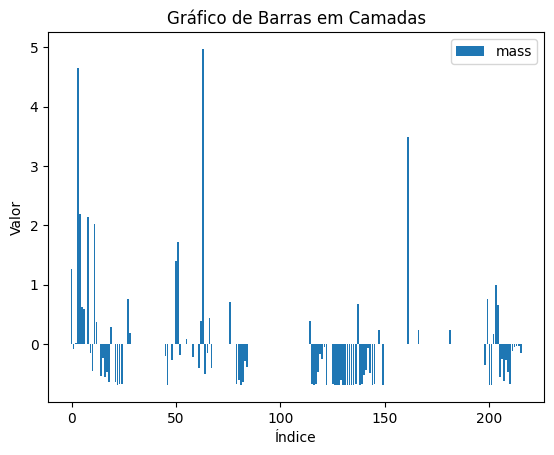

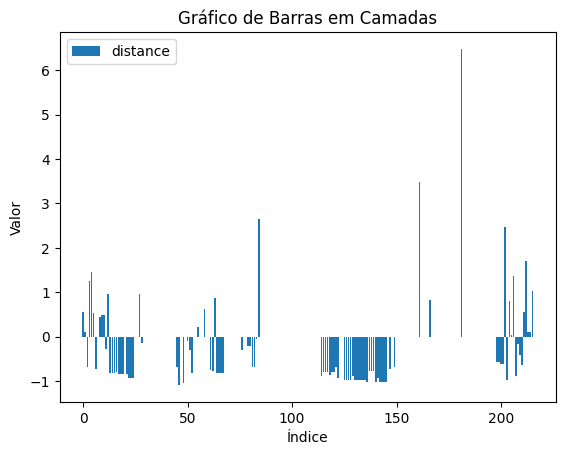

In [ ]:
# gráfico de barras em camadas (apenas 100)
colunas_para_plotar = ["orbital_period", "mass", "distance"]

for coluna in colunas_para_plotar:
    plt.bar(planets_df.index[:100], planets_df[coluna][:100], label=coluna)
    # legendas
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.title('Gráfico de Barras em Camadas')
    # cores
    plt.legend()
    plt.show()

In [ ]:
# z-score em: orbital_period, mass e distance

def z_score(df, coluna):
  media = df[coluna].mean()
  desvio_padrao = df[coluna].std()
  df[coluna] = (df[coluna] - media) / desvio_padrao
  print(f"Média: {media}, Desvio Padrão: {desvio_padrao}")
  return df

planets_df = z_score(planets_df, "orbital_period")
planets_df = z_score(planets_df, "mass")
planets_df = z_score(planets_df, "distance")

planets_df

Média: -1.070094481566416e-17, Desvio Padrão: 1.0
Média: 4.458727006526733e-17, Desvio Padrão: 0.9999999999999999
Média: 0.0, Desvio Padrão: 0.9999999999999999


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,0.166667,-0.385588,1.262468,0.543647,0.996028
1,Radial Velocity,0.166667,0.026543,-0.082315,0.104768,0.997021
2,Radial Velocity,0.166667,-0.049539,0.024938,-0.691651,0.998510
3,Radial Velocity,0.166667,-0.346974,4.645051,1.256583,0.996524
4,Radial Velocity,0.166667,-0.217516,2.197491,1.446513,0.997517
...,...,...,...,...,...,...
640,Radial Velocity,0.166667,-0.492863,-0.112566,-0.797669,0.997517
641,Radial Velocity,0.166667,-0.565457,-0.396373,-0.163280,0.999503
642,Radial Velocity,0.166667,-0.357008,-0.156567,-0.747450,0.992552
649,Transit,0.166667,-0.567054,-0.285820,2.702628,0.999503


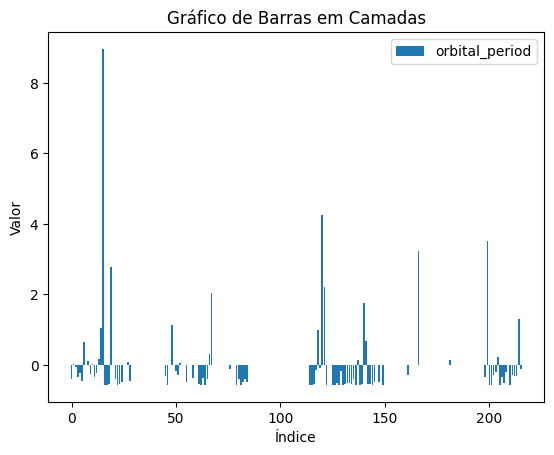

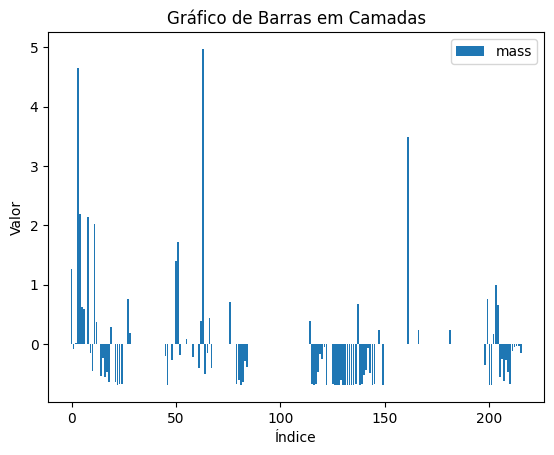

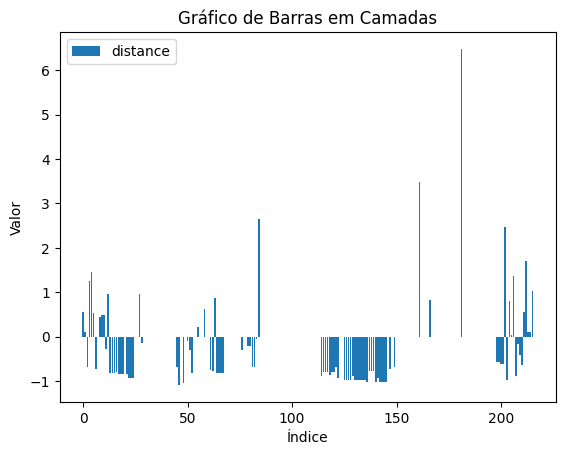

In [ ]:
# gráfico de barras em camadas (apenas 100)
colunas_para_plotar = ["orbital_period", "mass", "distance"]

for coluna in colunas_para_plotar:
    plt.bar(planets_df.index[:100], planets_df[coluna][:100], label=coluna)
    # legendas
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.title('Gráfico de Barras em Camadas')
    # cores
    plt.legend()
    plt.show()